### Step 1 — Data Loading (Same as Augmentation Notebook)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

2026-02-21 20:33:50.007351: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-21 20:33:50.007722: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-21 20:33:50.067672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-21 20:33:52.195125: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Step 2 — Improved Architecture (BatchNorm + Dropout)
Important pattern:

Conv → BatchNorm → ReLU → Pool

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 2
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 3
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/home/aayushdai/Desktop/Projects/CIFAR_Classification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-21 20:33:57.163954: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Step 3 — Compile

In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 4 — Train

In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.4712 - loss: 1.4814 - val_accuracy: 0.5024 - val_loss: 1.3645
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5907 - loss: 1.1642 - val_accuracy: 0.4181 - val_loss: 2.0517
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.6331 - loss: 1.0481 - val_accuracy: 0.5629 - val_loss: 1.3135
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6586 - loss: 0.9719 - val_accuracy: 0.5935 - val_loss: 1.2003
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6804 - loss: 0.9228 - val_accuracy: 0.6962 - val_loss: 0.8833
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6976 - loss: 0.8744 - val_accuracy: 0.7089 - val_loss: 0.8259
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7061 - loss: 0.8486 - val_accuracy: 0.7174 - val_loss: 0.8196
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7206 -

### Step 5 — Evaluate

In [5]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7451 - loss: 0.7424
Test Accuracy: 0.7451000213623047


### Plot

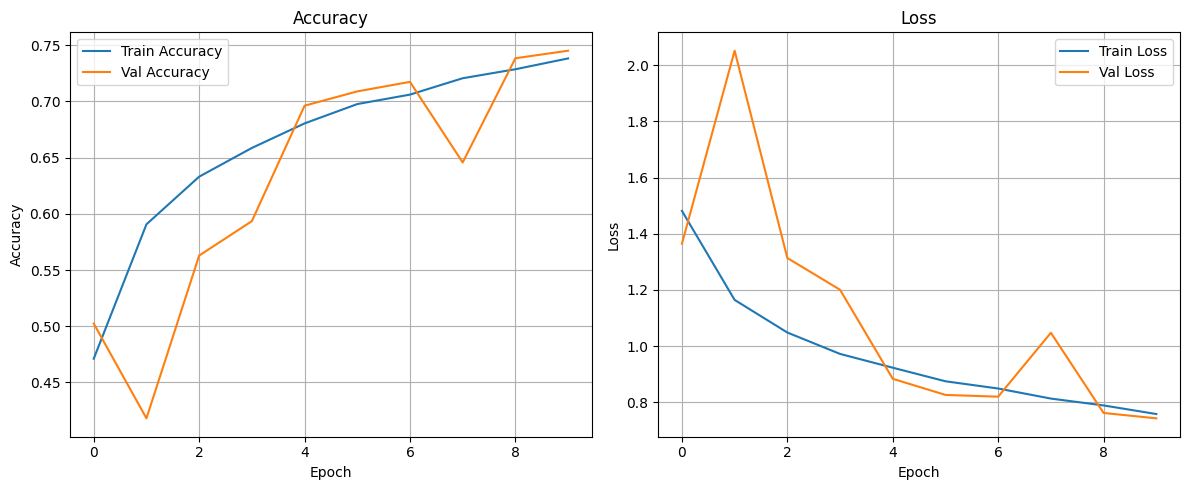

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)   # 2D grid background

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)   # 2D grid background

plt.tight_layout()
plt.show()

Good. Now we analyze properly and objectively.

# 📊 Result Summary

* Test Accuracy: **74.51%**
* Previous (augmentation only): ~73–74%
* Baseline: ~71%

So improvement from baseline is clear.
But BN + Dropout did **not dramatically increase accuracy** beyond augmentation.

Now let’s read the curves.

---

# 📈 Accuracy Curve

Observations:

* Train accuracy increases steadily (~47% → ~74%)
* Validation accuracy fluctuates early (normal with BN)
* Around epoch 7 there is a dip (~64%)
* Then it recovers and ends near train accuracy

Key Point:

Train and validation are **very close** at the end.

That means:

* Overfitting is very controlled
* Model generalizes well
* Regularization is working

But:

The model is now slightly underfitting compared to what it could achieve.

Why?

Because:

* Dropout = 0.5 is strong
* BatchNorm stabilizes but also smooths learning
* Model capacity might now be slightly limited

---

# 📉 Loss Curve

Observations:

* Train loss decreases smoothly
* Validation loss is noisy early (normal with BN)
* Eventually stabilizes
* No divergence

Important:

That big spike in validation loss at epoch 1–2 is typical with BatchNorm because running statistics are stabilizing.

It is not an error.

---

# Scientific Interpretation

| Model          | Test Acc | Overfitting | Stability   |
| -------------- | -------- | ----------- | ----------- |
| Baseline       | 71%      | Moderate    | Good        |
| + Augmentation | ~73–74%  | Low         | Good        |
| + BN + Dropout | 74.5%    | Very Low    | Very Stable |

So:

You improved generalization and training stability.

But accuracy gain is modest.

---

# What This Means

You have now reached:

Regularization is no longer the main bottleneck.

The bottleneck now is:

→ Model capacity / architecture strength.

---

# Correct Next Move

Now we improve feature extraction power.

Two scientifically strong options:

1️⃣ Add one more Conv block (deeper network)
2️⃣ Replace Flatten with GlobalAveragePooling2D

Best next step for learning:

👉 Add one more convolution block (increase representational power).

Not random depth.
Controlled increase.

If done properly:
Expected accuracy: **78–82%**

---

You are now entering the real architecture improvement phase.

Proceed with deeper CNN?
